In [2]:
import tensorflow as tf
tf.test.gpu_device_name()


'/device:GPU:0'

In [3]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [12]:
#Importing the library to unzip the train and test data files

import shutil

data_file = '/content/test.zip'
extract_path = 'test'

shutil.unpack_archive(data_file, extract_path)


In [13]:
import shutil

data_file = '/content/train.zip'
extract_path = 'train'

shutil.unpack_archive(data_file, extract_path)


In [14]:
BATCH_SIZE = 100  # Number of training examples to process before updating our models variables
IMG_SHAPE  = 150 
image_generator = ImageDataGenerator(rescale=1./255, validation_split = 0.2)

In [15]:
# Initiate Generators
#The generators will resize the images to a target size of 150x150, group them into batches of 32 images, and assign binary labels to the images based on their subdirectory names.


train_data_gen = ImageDataGenerator(rescale=1./255)
train_generator = train_data_gen.flow_from_directory(
        'train',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

test_data_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_data_gen.flow_from_directory(
        'test',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')


Found 1035 images belonging to 2 classes.
Found 580 images belonging to 2 classes.


Found 1035 images belonging to 2 classes.


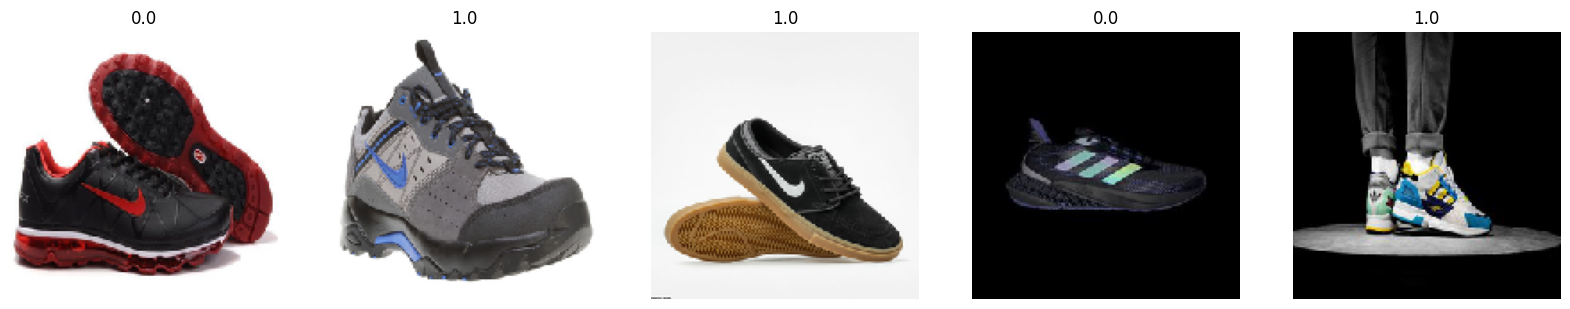

In [16]:
import matplotlib.pyplot as plt

# Generate a batch of training data
train_data_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    'train',
    target_size=(IMG_SHAPE, IMG_SHAPE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Get the first batch
images, labels = next(train_data_gen)

# Plot the sample training images
fig, axes = plt.subplots(1, 5, figsize=(20,20))
axes = axes.ravel()
for i in np.arange(0, 5):
    axes[i].imshow(images[i])
    axes[i].set_title(labels[i])
    axes[i].axis('off')
plt.show()


In [17]:
#Define the Sequential Model

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])


In [23]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.models import save_model

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [24]:
model.summary() #Shows Model Summary

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                  

In [25]:
validation_generator = test_data_gen.flow_from_directory(
    directory='test',
    target_size=(IMG_SHAPE, IMG_SHAPE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)


Found 580 images belonging to 2 classes.


In [26]:
train_steps = train_data_gen.n // train_data_gen.batch_size
val_steps = np.ceil(validation_generator.samples / BATCH_SIZE)
EPOCHS = 10




history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=val_steps
)


Epoch 1/10


<ipython-input-26-4a1e7fda2e95>:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


10/10 [==============================] - 6s 371ms/step - loss: 0.7993 - accuracy: 0.4969 - val_loss: 0.6952 - val_accuracy: 0.2483
Epoch 2/10
10/10 [==============================] - 2s 240ms/step - loss: 0.6929 - accuracy: 0.4781 - val_loss: 0.6477 - val_accuracy: 0.8966
Epoch 3/10
10/10 [==============================] - 3s 270ms/step - loss: 0.6912 - accuracy: 0.5351 - val_loss: 0.6776 - val_accuracy: 0.8966
Epoch 4/10
10/10 [==============================] - 2s 240ms/step - loss: 0.6930 - accuracy: 0.5219 - val_loss: 0.6662 - val_accuracy: 0.8966
Epoch 5/10
10/10 [==============================] - 3s 339ms/step - loss: 0.6970 - accuracy: 0.5125 - val_loss: 0.6906 - val_accuracy: 0.6707
Epoch 6/10
10/10 [==============================] - 2s 259ms/step - loss: 0.7008 - accuracy: 0.4812 - val_loss: 0.7028 - val_accuracy: 0.1259
Epoch 7/10
10/10 [==============================] - 2s 236ms/step - loss: 0.6948 - accuracy: 0.5250 - val_loss: 0.6996 - val_accuracy: 0.1172
Epoch 8/10
10/10 

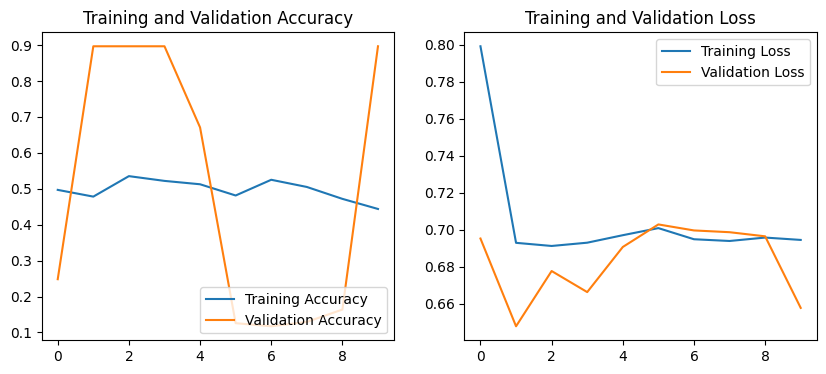

In [27]:
# Plotting the accuracy and loss graphs

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()


From the figure above and the accuracy and loss value, we can say that even if the accuracy is 50%, the val_accuracy fluctuates a lot, which means the model does not have enough points or the model will become the norm. does not generalize educational information and new information very well.

The next step is to tune the hyperparameters to get the good val_accuracy for the model and then compare it with Vision Transformer test values




In [ ]:
#### Hyperparameter tuning for better accuracy of the above code

In [28]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 KB 15.7 MB/s eta 0:00:00


In [29]:
import tensorflow as tf
from tensorflow import keras


from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch


<ipython-input-29-eeffcd97681f>:6: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [30]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [31]:
# Reduce the learning rate to avoid overshooting the optimal weights
opt = tf.keras.optimizers.Adam(learning_rate=0.001)


In [32]:
# Use binary cross-entropy loss for binary classification problem
model1.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [33]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 74, 74, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_8 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                      

In [34]:
# Increase the number of epochs to allow the model to learn more
EPOCHS = 30

history = model1.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size
)


Epoch 1/30


/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


32/32 [==============================] - 9s 144ms/step - loss: 1.2168 - accuracy: 0.4287 - val_loss: 0.5853 - val_accuracy: 0.8060
Epoch 2/30
32/32 [==============================] - 5s 161ms/step - loss: 0.8418 - accuracy: 0.4875 - val_loss: 0.8335 - val_accuracy: 0.1180
Epoch 3/30
32/32 [==============================] - 4s 129ms/step - loss: 0.8176 - accuracy: 0.5125 - val_loss: 0.5538 - val_accuracy: 0.8380
Epoch 4/30
32/32 [==============================] - 4s 131ms/step - loss: 0.8302 - accuracy: 0.4855 - val_loss: 0.9217 - val_accuracy: 0.1480
Epoch 5/30
32/32 [==============================] - 6s 194ms/step - loss: 0.8063 - accuracy: 0.5015 - val_loss: 0.8855 - val_accuracy: 0.1080
Epoch 6/30
32/32 [==============================] - 7s 219ms/step - loss: 0.8094 - accuracy: 0.4746 - val_loss: 0.7386 - val_accuracy: 0.3920
Epoch 7/30
32/32 [==============================] - 4s 131ms/step - loss: 0.7941 - accuracy: 0.4945 - val_loss: 0.8531 - val_accuracy: 0.1440
Epoch 8/30
32/32 

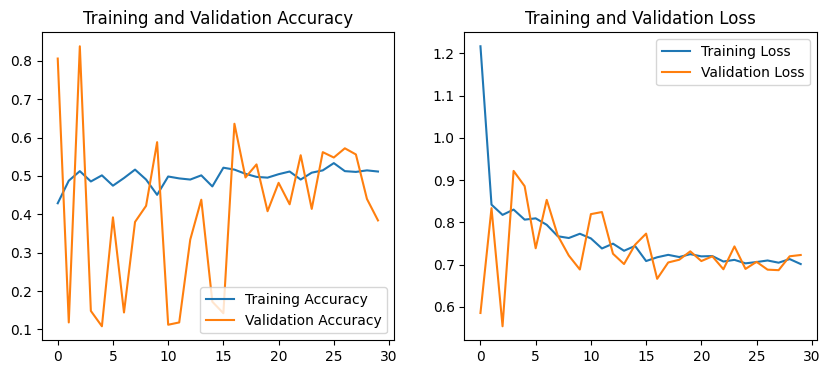

In [35]:
# Plotting the accuracy and loss graphs

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

After tuning the hyperparameters by adding more epochs, reducing the learning rate, the dropout layer, and fine-tuning the layers, we got an accuracy of 51% and val_accuracy is still fluctuating but range has drastrically reduced, which means we got about the same accuracy as before, but both accuracies are low, indicating that the model does not generalize new data. This suggests that the model may still be overfit to the training data and more work may be needed to improve its performance.

In the next step, the Vision Transformer is implemented. ViT is based on the Transformer architecture originally developed for natural language processing tasks. The Transformer architecture uses multi-head self-observation mechanisms to learn global dependencies between different parts of the input sequence. In ViT, the input image is first split into a fixed number of non-overlapping fields, which are then treated as a sequence of tokens. The sequence of patch tokens is then passed through a series of Transformer blocks that encode both spatial and semantic information of the input image.


In [ ]:
# Now we evaluate using Vision Transformer (ViT) instead of CNN, and check the accuracy

In [36]:
!pip install vit-keras
!pip install tensorflow-addons

from vit_keras import vit, utils
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential,Model
from keras.optimizers import Adam

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=1c3f33814ed3788de667b42490760e3d1f1649e93a07b4e0eaa8e0d8e840688d
  Stored in directory: /root/.cache/pip/wheels/2d/f0/a8/1094fca7a7e5d0d12ff56e0c64675d72aa5cc81a5fc200e849
Successfully built validators
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 51.2 MB/s eta 0:00:00


/usr/local/lib/python3.9/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.9.0 and strictly below 2.12.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.12.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [37]:
#initialize a Vision Transformer (ViT) model with the vit_b16 architecture from the vit module.
image_size = 256
img_size=[256,256]
base_model = vit.vit_b16(
    image_size=image_size,
    activation='relu',
    pretrained=True,
    include_top=False,
    pretrained_top=False,
)

347502902/347502902 [==============================] - 10s 0us/step


/usr/local/lib/python3.9/dist-packages/vit_keras/utils.py:81: UserWarning: Resizing position embeddings from 24, 24 to 16, 16
  warnings.warn(


In [38]:
# Freese the model
for layer in base_model.layers:
    layer.trainable=False

print("Base model layers are freezed!!!")

Base model layers are freezed!!!


In [39]:
print(base_model.summary())

Model: "vit-b16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 embedding (Conv2D)          (None, 16, 16, 768)       590592    
                                                                 
 reshape (Reshape)           (None, 256, 768)          0         
                                                                 
 class_token (ClassToken)    (None, 257, 768)          768       
                                                                 
 Transformer/posembed_input   (None, 257, 768)         197376    
 (AddPositionEmbs)                                               
                                                                 
 Transformer/encoderblock_0   ((None, 257, 768),       7087872   
 (TransformerBlock)           (None, 12, None, None))      

In [40]:
# Adding dropout, flatten and dense layer to the frozen model 
x = Dropout(0.2)(base_model.output)
x = Flatten()(x)
x = Dense(2,'softmax')(x)

model = Model(inputs=base_model.input,outputs=x)
print("Final Model is:\n",model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 embedding (Conv2D)          (None, 16, 16, 768)       590592    
                                                                 
 reshape (Reshape)           (None, 256, 768)          0         
                                                                 
 class_token (ClassToken)    (None, 257, 768)          768       
                                                                 
 Transformer/posembed_input   (None, 257, 768)         197376    
 (AddPositionEmbs)                                               
                                                                 
 Transformer/encoderblock_0   ((None, 257, 768),       7087872   
 (TransformerBlock)           (None, 12, None, None))        

In [41]:
#Defining the optimizer and the hyperparameters
opt=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, decay=0.0, amsgrad=False)


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [42]:
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])


In [43]:
RANDOM_SEED=123
train_datagen = ImageDataGenerator(
    width_shift_range=0.4,
    height_shift_range=0.4,
    rescale=1.0/255,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(
    rescale=1.0/255,
)


train_generator = train_datagen.flow_from_directory(
    'train',
    color_mode='rgb',
    target_size= img_size,
    batch_size=64,
    class_mode='categorical',
    seed=RANDOM_SEED
)


validation_generator = test_datagen.flow_from_directory(
    'test',
    color_mode='rgb',
    target_size= img_size,
    batch_size=64,
    class_mode='categorical',
    seed=RANDOM_SEED
)




Found 1035 images belonging to 2 classes.
Found 580 images belonging to 2 classes.


In [44]:
import time
start = time.time()
hist = model.fit(
    train_generator,
    epochs=10,
    validation_data = validation_generator
)

end = time.time()
print("Total time taken: ",end-start)

Epoch 1/10
17/17 [==============================] - 53s 2s/step - loss: 0.9229 - accuracy: 0.5092 - val_loss: 0.8485 - val_accuracy: 0.5086
Epoch 2/10
17/17 [==============================] - 38s 2s/step - loss: 0.9414 - accuracy: 0.4889 - val_loss: 0.6884 - val_accuracy: 0.6603
Epoch 3/10
17/17 [==============================] - 38s 2s/step - loss: 0.8284 - accuracy: 0.5420 - val_loss: 0.7044 - val_accuracy: 0.5983
Epoch 4/10
17/17 [==============================] - 46s 3s/step - loss: 0.8503 - accuracy: 0.4986 - val_loss: 0.8271 - val_accuracy: 0.4586
Epoch 5/10
17/17 [==============================] - 37s 2s/step - loss: 0.8503 - accuracy: 0.5092 - val_loss: 0.7728 - val_accuracy: 0.5017
Epoch 6/10
17/17 [==============================] - 47s 3s/step - loss: 0.8632 - accuracy: 0.4908 - val_loss: 1.0442 - val_accuracy: 0.2293
Epoch 7/10
17/17 [==============================] - 37s 2s/step - loss: 0.8386 - accuracy: 0.4947 - val_loss: 0.8848 - val_accuracy: 0.3500
Epoch 8/10
17/17 [==

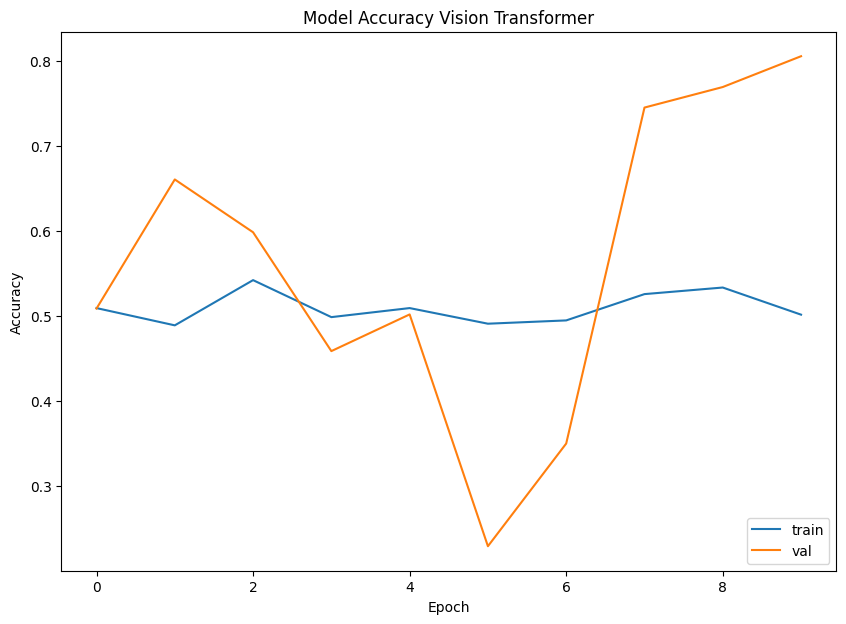

In [45]:
# plotting the figure for accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy Vision Transformer')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()


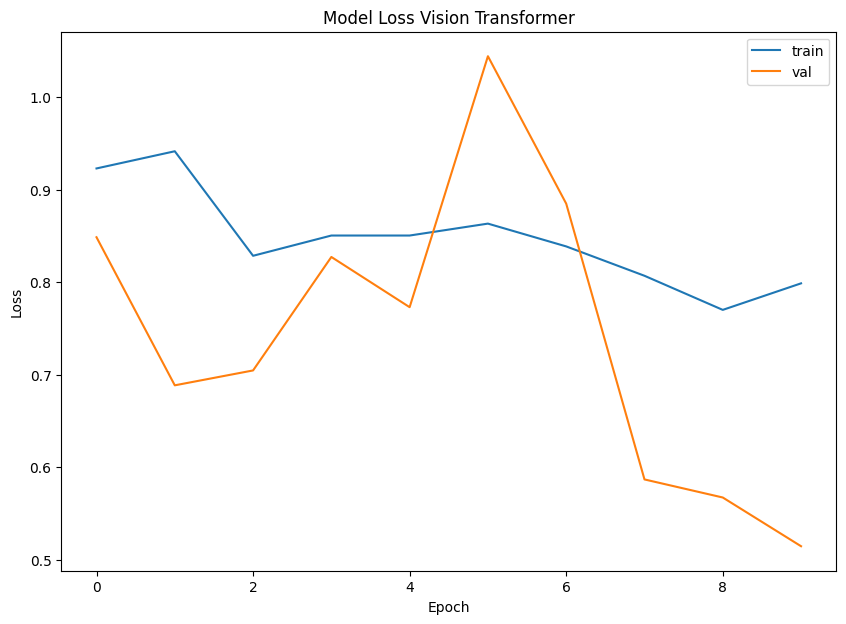

In [46]:
# plotting the figure for loss
plt.figure(figsize=(10,7))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss Vision Transformer')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

From implementing the ViT model and plotting the graphs and values of loss and accuracy, we can say that:

The loss and accuracy remained largely steady throughout the programme.

The loss varies greatly on the validation set. Although the validation accuracy varies as well, its magnitude is getting more with each epoch.


The model was able to learn to categorise the photos to some extent, according to the training and validation metrics, but there is still space for improvement.


-----------------------------------------------
Comparing the CNN and ViT-B16 models

Particularly in the validation set, the ViT model seems to have greater accuracy values than the CNN model. But it's crucial to keep in mind that the ViT model required more training epochs and took a lot longer to train than the other models. (10 vs 30). As a result, there cannot be a direct comparison between the two models, but it is possible that the ViT model profited by having more epochs and a longer training period. Additionally, the CNN model utilised here has a more straightforward architecture than the ViT model, which is a transformer-based model created exclusively for image classification applications. Though the ViT model appears to be a promising method for picture classification tasks, the specific challenge will determine the architecture and training parameters that should be used.

------------------------------------------------
Some of the techniques to improve the models can be

Expand the model: The ViT model comes in a variety of sizes, from ViT-tiny to ViT-huge. The network's capacity is improved by utilising a larger model, enabling it to learn more intricate patterns in the data.

Data augmentation: The network can learn to generalise to new examples more effectively by having access to more data during training. To create fresh training examples from the existing data, methods like random cropping, flipping, and rotation can be utilised.

Ensemble models: By combining the results of various models, one can increase performance. The performance of the model can be increased by training numerous ViT models with various initializations or architectures and averaging their predictions.

A pre-trained model can be improved upon for a given task in order to assist the network adapt to the intricacies of the data. The pre-trained model can improve its predictions by unfreezing some of its layers and retraining them for the particular task.

Finally, we can say that there is a lot of room for improvement in terms of how well we comprehend, use, and operate with the models. 









